In [1]:
# Multiple fleets, Graphs

#### On Feb 28 2023 

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
sns.set(rc={'figure.figsize':(20,14)})
sns.set_theme(style="whitegrid")

In [3]:
path = 'H:/.shortcut-targets-by-id/1xuAay2JQWDmg2wb0MD2Ft4mCSjufwjq3/BEAM CORE - LBNL NREL Collaboration/Task4 Deep Dive Analyses/3. Fleet Size -- and Multiple Fleets paper/'
path_data = path + 'data/'
path_output = path + 'plots/'

In [4]:
#df_temp = pd.read_csv(path_data + 'SummaryWait.csv')
df_temp = pd.read_csv(path_data + 'sf_2018_stacked_rh_fltsz_price_incRank_1_2_modifiedLeverNumbers.csv')
df_temp

,incRank,n_agents,n_trips,Potential_INEXUS_mean,Potential_INEXUS_median,cost_BEAM_mean,cost_BEAM_median,cost_BEAM_sum,distance_bike_mean,distance_bike_median,...,waitTime_replanning_car_median,waitTime_replanning_car_hov2_median,waitTime_replanning_car_hov3_median,waitTime_replanning_drive_transit_median,waitTime_replanning_hov2_teleportation_median,waitTime_replanning_hov3_teleportation_median,waitTime_replanning_ride_hail_median,waitTime_replanning_ride_hail_pooled_median,waitTime_replanning_walk_median,waitTime_replanning_walk_transit_median
0,0.0,91811.0,319870.0,-0.6205,-0.3677,0.8773,0.3417,280636.8546,73.5913,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.0,0.0,0.0
1,1.0,87944.0,308814.0,-0.6481,-0.4004,0.9055,0.3581,279621.7586,72.4422,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,0.0,0.0
2,2.0,87362.0,321287.0,-0.6653,-0.4247,0.9386,0.3767,301559.3106,75.3930,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.0,0.0,0.0
3,3.0,96029.0,359786.0,-0.5785,-0.3467,0.9996,0.4084,359642.1773,65.5887,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.0,0.0,0.0
4,4.0,94883.0,355740.0,-0.5815,-0.3496,1.0281,0.4277,365753.7369,64.6408,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,16.0,99226.0,392993.0,-0.5279,-0.3016,1.8329,0.6443,720330.4909,48.0449,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
479,17.0,85139.0,334777.0,-0.5251,-0.3024,1.8313,0.6597,613079.8439,46.6004,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
480,18.0,94754.0,373085.0,-0.5334,-0.3121,1.8319,0.6672,683464.6233,47.0704,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
481,19.0,89476.0,351140.0,-0.5182,-0.2969,1.8515,0.6697,650121.0106,48.2313,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#df_temp.info()
#df_temp.describe()
#print(df_temp.columns.tolist())
print(df_temp.columns.values)

['incRank' 'n_agents' 'n_trips' 'Potential_INEXUS_mean'
 'Potential_INEXUS_median' 'cost_BEAM_mean' 'cost_BEAM_median'
 'cost_BEAM_sum' 'distance_bike_mean' 'distance_bike_median'
 'distance_bike_sum' 'distance_mode_choice_mean'
 'distance_mode_choice_median' 'distance_mode_choice_sum'
 'distance_privateCar_mean' 'distance_privateCar_median'
 'distance_privateCar_sum' 'distance_ridehail_mean'
 'distance_ridehail_median' 'distance_ridehail_sum'
 'distance_transit_mean' 'distance_transit_median' 'distance_transit_sum'
 'distance_travelling_mean' 'distance_travelling_median'
 'distance_travelling_sum' 'distance_walking_mean'
 'distance_walking_median' 'distance_walking_sum'
 'duration_door_to_door_mean' 'duration_door_to_door_median'
 'duration_door_to_door_sum' 'duration_in_privateCar_mean'
 'duration_in_privateCar_median' 'duration_in_privateCar_sum'
 'duration_in_ridehail_mean' 'duration_in_ridehail_median'
 'duration_in_ridehail_sum' 'duration_in_transit_mean'
 'duration_in_transit_me

In [6]:
df_temp['mode_transit_sum'] = df_temp['mode_bike_transit_sum'] + df_temp['mode_drive_transit_sum']+df_temp['mode_walk_transit_sum']

In [7]:
cd0 = df_temp[['lever_n_fleets' ,'lever_position_price', 'lever_position_fltsz',
              'incRank', 'n_agents' ,'n_trips' ]]
cd0 = df_temp[['lever_n_fleets' ,'lever_position_price', 'lever_position_fltsz',
               'mode_ride_hail_pooled_sum', 'mode_ride_hail_solo_sum', 'mode_ridehail_total_sum', 'mode_walk_sum', 'mode_walk_transit_sum' ]]
cd0 = df_temp
cd0

,incRank,n_agents,n_trips,Potential_INEXUS_mean,Potential_INEXUS_median,cost_BEAM_mean,cost_BEAM_median,cost_BEAM_sum,distance_bike_mean,distance_bike_median,...,waitTime_replanning_car_hov2_median,waitTime_replanning_car_hov3_median,waitTime_replanning_drive_transit_median,waitTime_replanning_hov2_teleportation_median,waitTime_replanning_hov3_teleportation_median,waitTime_replanning_ride_hail_median,waitTime_replanning_ride_hail_pooled_median,waitTime_replanning_walk_median,waitTime_replanning_walk_transit_median,mode_transit_sum
0,0.0,91811.0,319870.0,-0.6205,-0.3677,0.8773,0.3417,280636.8546,73.5913,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,118.0,0.0,0.0,28230.0
1,1.0,87944.0,308814.0,-0.6481,-0.4004,0.9055,0.3581,279621.7586,72.4422,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,112.0,0.0,0.0,24816.0
2,2.0,87362.0,321287.0,-0.6653,-0.4247,0.9386,0.3767,301559.3106,75.3930,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,107.0,0.0,0.0,26231.0
3,3.0,96029.0,359786.0,-0.5785,-0.3467,0.9996,0.4084,359642.1773,65.5887,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,118.0,0.0,0.0,24736.0
4,4.0,94883.0,355740.0,-0.5815,-0.3496,1.0281,0.4277,365753.7369,64.6408,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,23366.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,16.0,99226.0,392993.0,-0.5279,-0.3016,1.8329,0.6443,720330.4909,48.0449,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21630.0
479,17.0,85139.0,334777.0,-0.5251,-0.3024,1.8313,0.6597,613079.8439,46.6004,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18058.0
480,18.0,94754.0,373085.0,-0.5334,-0.3121,1.8319,0.6672,683464.6233,47.0704,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20222.0
481,19.0,89476.0,351140.0,-0.5182,-0.2969,1.8515,0.6697,650121.0106,48.2313,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19180.0


In [8]:
cd5=cd0.loc[(cd0['lever_n_fleets']==5)]
cd2=cd0.loc[(cd0['lever_n_fleets']==2)]
cd1=cd0.loc[(cd0['lever_n_fleets']==1)]
cd5

,incRank,n_agents,n_trips,Potential_INEXUS_mean,Potential_INEXUS_median,cost_BEAM_mean,cost_BEAM_median,cost_BEAM_sum,distance_bike_mean,distance_bike_median,...,waitTime_replanning_car_hov2_median,waitTime_replanning_car_hov3_median,waitTime_replanning_drive_transit_median,waitTime_replanning_hov2_teleportation_median,waitTime_replanning_hov3_teleportation_median,waitTime_replanning_ride_hail_median,waitTime_replanning_ride_hail_pooled_median,waitTime_replanning_walk_median,waitTime_replanning_walk_transit_median,mode_transit_sum
42,0.0,91807.0,319599.0,-0.6302,-0.3721,0.8636,0.3388,276002.5313,72.4848,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,27814.0
43,1.0,87954.0,308817.0,-0.6525,-0.4019,0.8949,0.3568,276370.3610,69.6794,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,106.0,0.0,0.0,24930.0
44,2.0,87336.0,321321.0,-0.6683,-0.4249,0.9306,0.3778,299024.1991,74.1597,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,26278.0
45,3.0,95986.0,359081.0,-0.5841,-0.3509,0.9922,0.4084,356295.2279,63.8723,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,93.0,0.0,0.0,25021.0
46,4.0,94868.0,355398.0,-0.5816,-0.3529,1.0142,0.4296,360437.5057,64.1566,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,109.0,0.0,0.0,23729.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,16.0,99226.0,392993.0,-0.5279,-0.3016,1.8329,0.6443,720330.4909,48.0449,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21630.0
479,17.0,85139.0,334777.0,-0.5251,-0.3024,1.8313,0.6597,613079.8439,46.6004,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18058.0
480,18.0,94754.0,373085.0,-0.5334,-0.3121,1.8319,0.6672,683464.6233,47.0704,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20222.0
481,19.0,89476.0,351140.0,-0.5182,-0.2969,1.8515,0.6697,650121.0106,48.2313,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19180.0


In [9]:
cd5collapsed = cd5.groupby(['lever_n_fleets' ,'lever_position_price', 'lever_position_fltsz']).mean().reset_index(drop=False)
cd2collapsed = cd2.groupby(['lever_n_fleets' ,'lever_position_price', 'lever_position_fltsz']).mean().reset_index(drop=False)
cd1collapsed = cd1.groupby(['lever_n_fleets' ,'lever_position_price', 'lever_position_fltsz']).mean().reset_index(drop=False)
cd0collapsed = cd0.groupby(['lever_n_fleets' ,'lever_position_price', 'lever_position_fltsz']).mean().reset_index(drop=False)
#pd.melt(cd)
#cd.describe()
cd0collapsed.head(50)
#cd = cd.where(['lever_n_fleets']==5)
#cd = cd.groupby(['lever_n_fleets' ,'lever_position_price', 'lever_position_fltsz']).sum()


,lever_n_fleets,lever_position_price,lever_position_fltsz,incRank,n_agents,n_trips,Potential_INEXUS_mean,Potential_INEXUS_median,cost_BEAM_mean,cost_BEAM_median,...,waitTime_replanning_car_hov2_median,waitTime_replanning_car_hov3_median,waitTime_replanning_drive_transit_median,waitTime_replanning_hov2_teleportation_median,waitTime_replanning_hov3_teleportation_median,waitTime_replanning_ride_hail_median,waitTime_replanning_ride_hail_pooled_median,waitTime_replanning_walk_median,waitTime_replanning_walk_transit_median,mode_transit_sum
0,1.0,1.00,1.00,10.0,91406.714286,351201.523810,-0.580505,-0.357962,1.162729,0.494381,...,0.0,0.0,0.0,0.0,0.0,0.000000,115.547619,0.0,0.0,21718.904762
1,2.0,0.27,1.00,10.0,91393.571429,351070.095238,-0.569152,-0.341505,1.179562,0.498171,...,0.0,0.0,0.0,0.0,0.0,79.595238,190.023810,0.0,0.0,23264.285714
2,2.0,0.47,1.00,10.0,91397.714286,351059.190476,-0.573519,-0.350719,1.168667,0.496319,...,0.0,0.0,0.0,0.0,0.0,0.000000,154.500000,0.0,0.0,22568.190476
3,2.0,1.00,1.00,10.0,91409.571429,351030.476190,-0.576457,-0.357652,1.155967,0.494157,...,0.0,0.0,0.0,0.0,0.0,0.000000,102.761905,0.0,0.0,21680.666667
4,2.0,1.00,1.64,10.0,91406.142857,351238.095238,-0.576024,-0.355719,1.217586,0.502295,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,21572.000000
5,2.0,1.00,2.00,10.0,91404.333333,351115.809524,-0.574724,-0.350710,1.239138,0.504457,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,21469.142857
6,2.0,1.00,4.00,10.0,91420.238095,351524.619048,-0.567443,-0.345062,1.317686,0.513676,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,21165.619048
7,2.0,1.00,10.00,10.0,91423.761905,351570.952381,-0.557971,-0.335167,1.386352,0.520338,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,20712.761905
8,5.0,0.27,1.00,10.0,91394.380952,350965.142857,-0.572167,-0.343938,1.173495,0.496529,...,0.0,0.0,0.0,0.0,0.0,112.714286,172.285714,0.0,0.0,23210.333333
9,5.0,0.27,1.64,10.0,91389.142857,351066.904762,-0.573624,-0.338071,1.247500,0.508757,...,0.0,0.0,0.0,0.0,0.0,0.000000,135.571429,0.0,0.0,23146.190476


<AxesSubplot:xlabel='lever_position_price', ylabel='mode_transit_sum'>

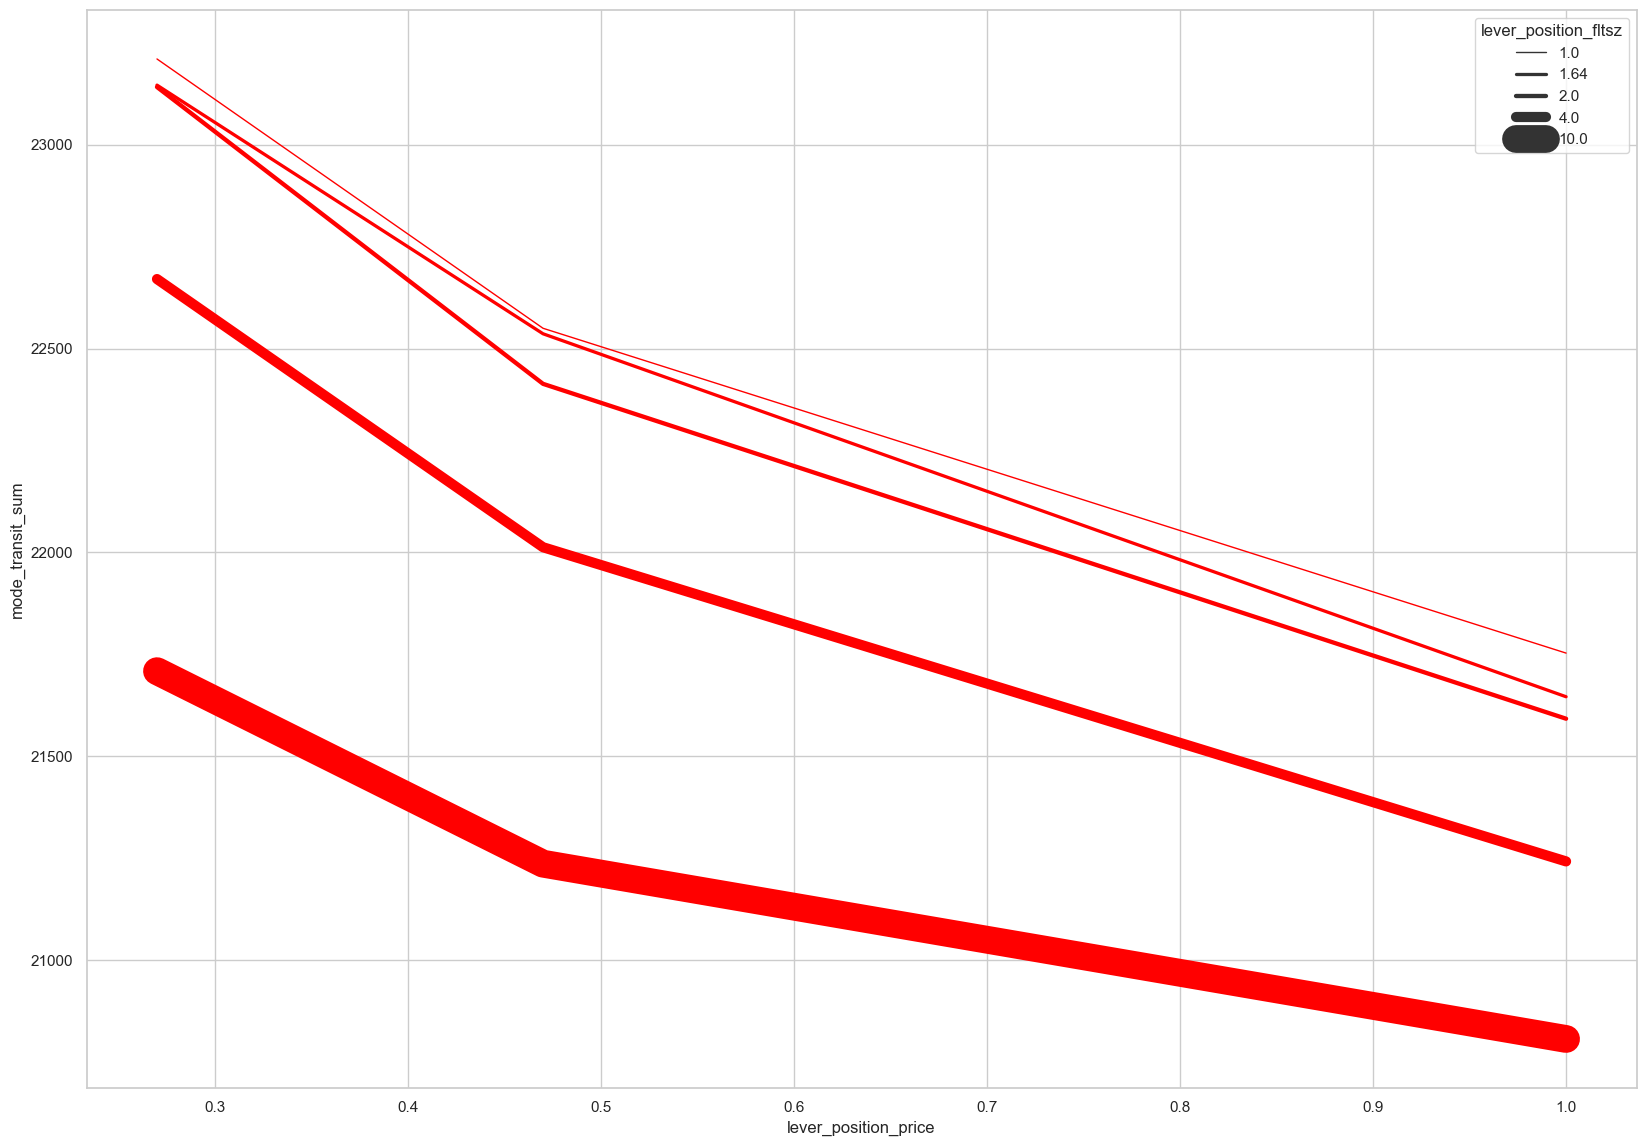

In [10]:
df_graph = cd5collapsed

sns.lineplot(data=df_graph,
             x='lever_position_price', size ="lever_position_fltsz", sizes=(1,20),
             y='mode_transit_sum', 
               ci=None, linewidth = 6,
             color='Red',
             palette = 'Greens'
             )

H:/.shortcut-targets-by-id/1xuAay2JQWDmg2wb0MD2Ft4mCSjufwjq3/BEAM CORE - LBNL NREL Collaboration/Task4 Deep Dive Analyses/3. Fleet Size -- and Multiple Fleets paper/plots/PriceXmode__03_03_2023_12_38_17.svg


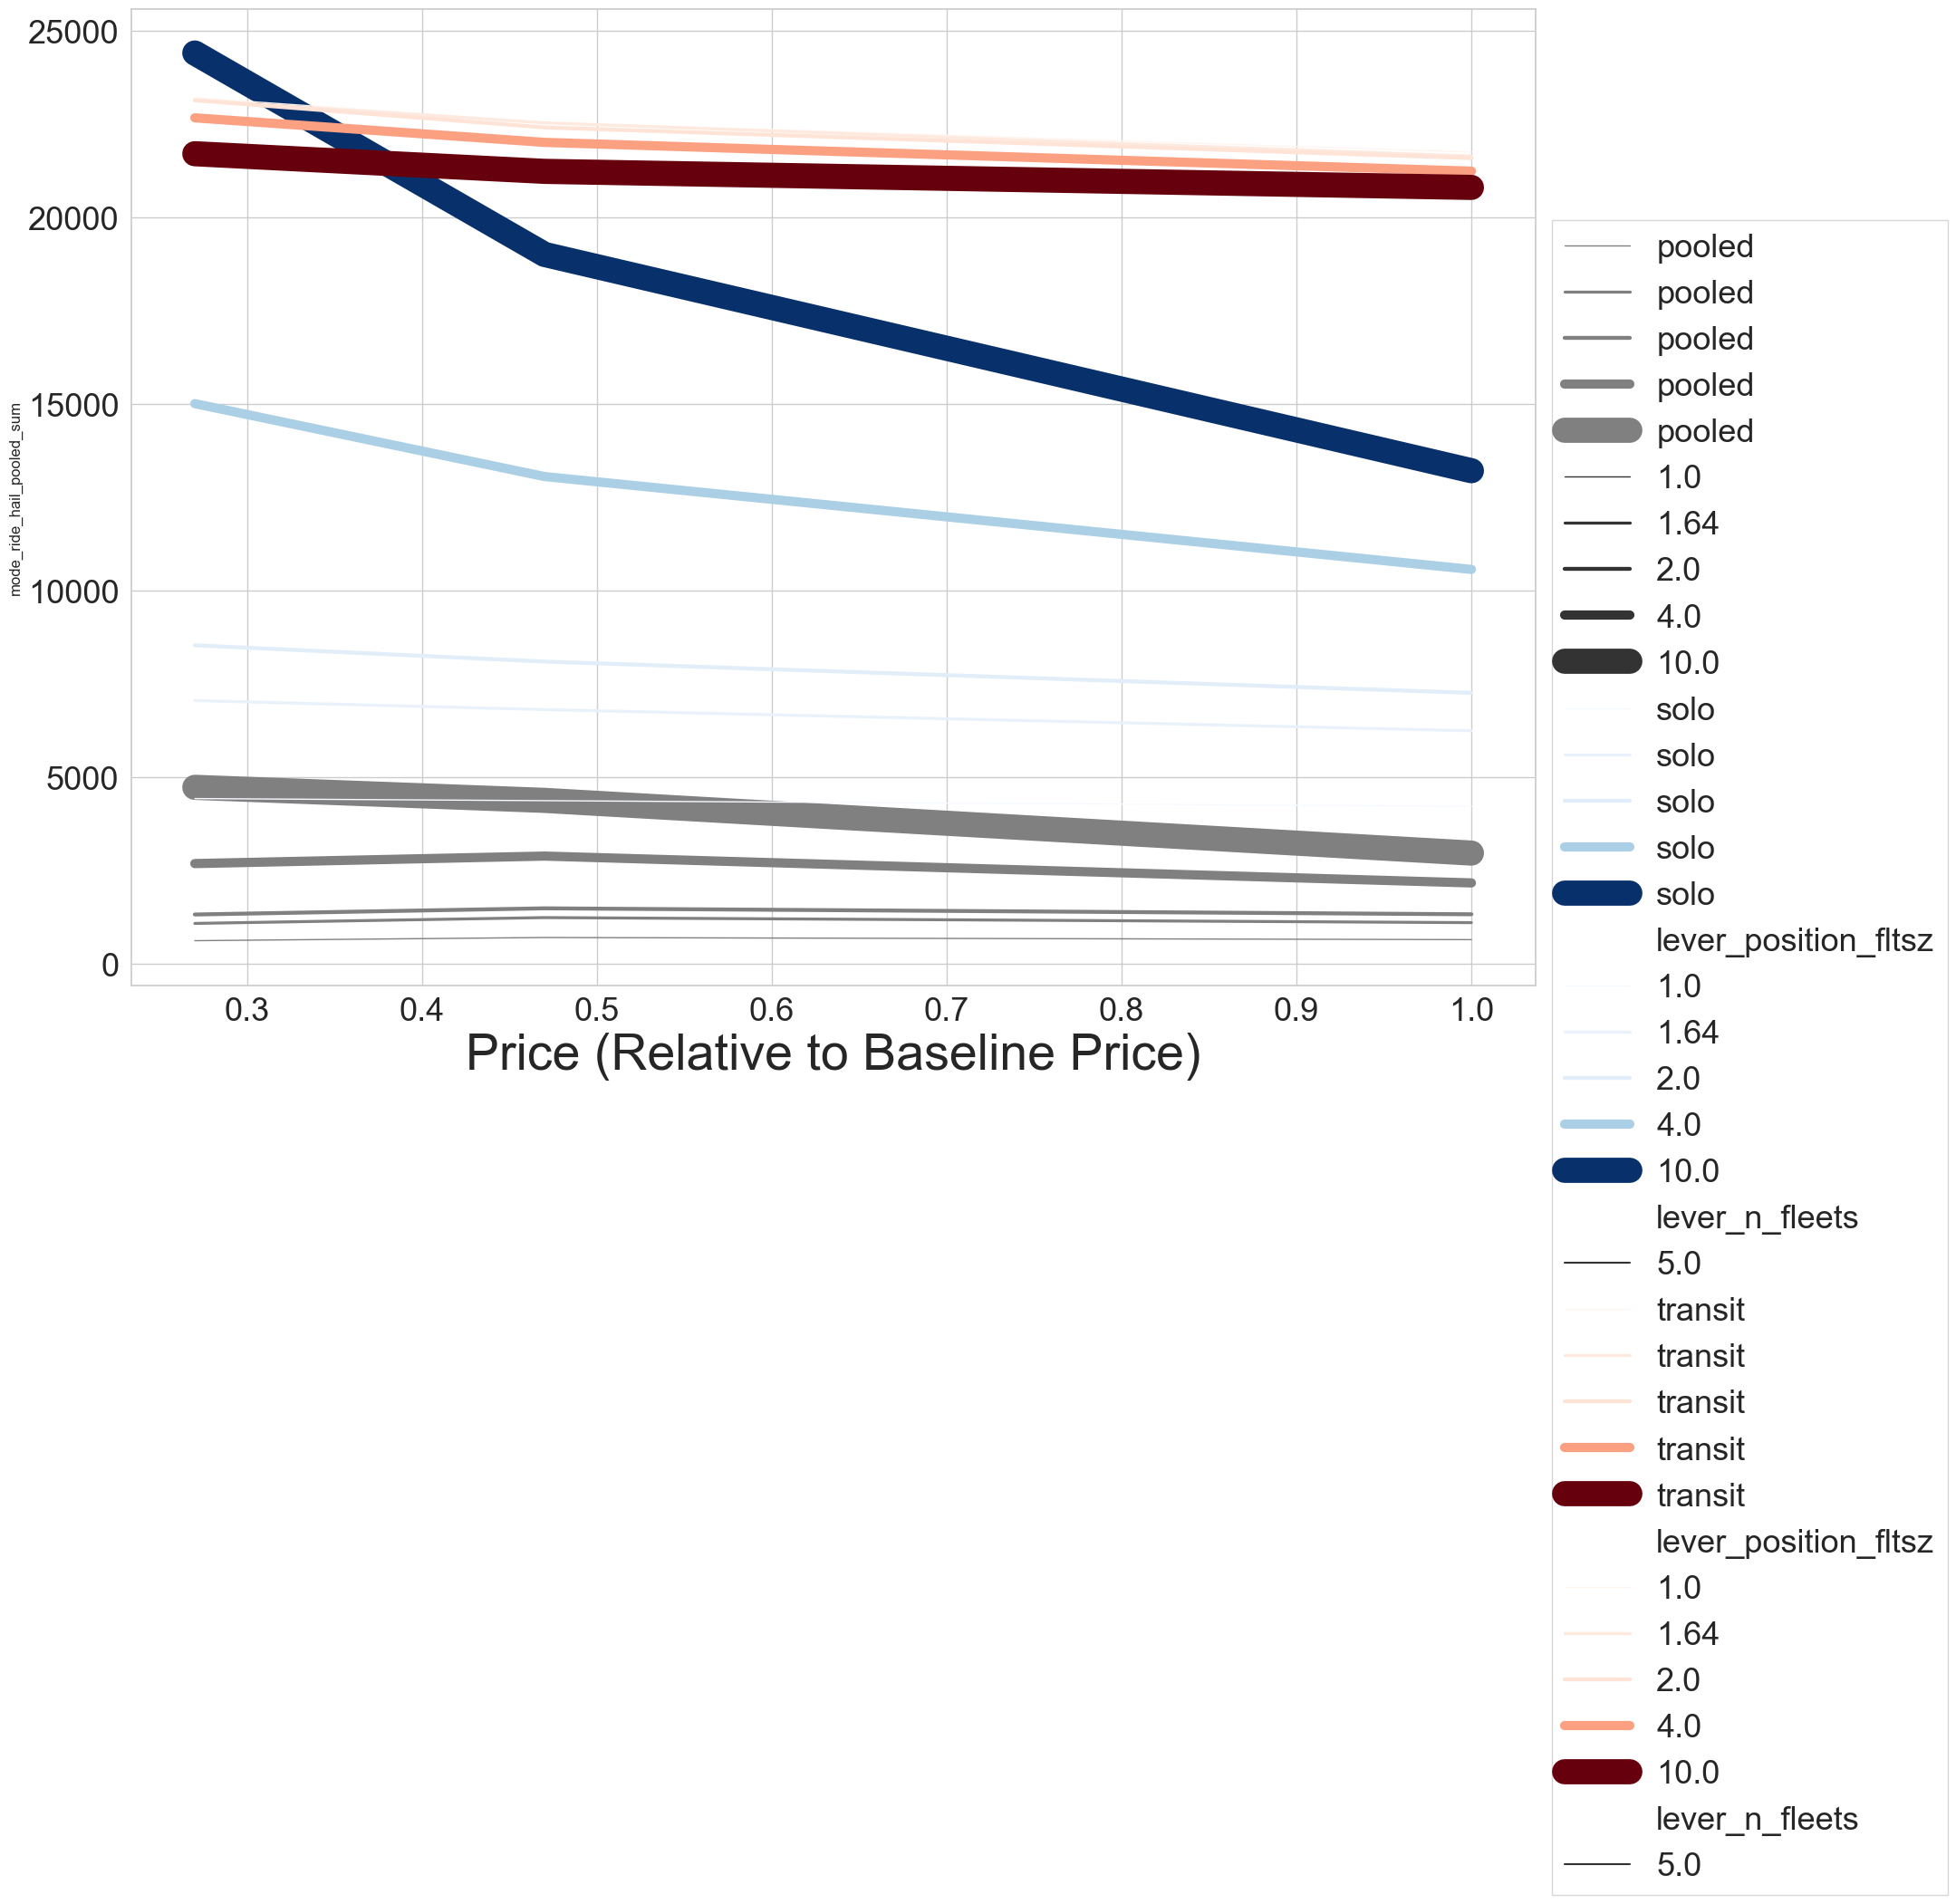

In [11]:
df_graph = cd5collapsed
#df_graph = cd0collapsed

g1=sns.lineplot(data=df_graph, x='lever_position_price', 
            y='mode_ride_hail_pooled_sum', 
            size ="lever_position_fltsz", sizes=(1,20),
            #hue='lever_position_fltsz',
            color="gray",
                ci=None, linewidth = 6,
            #legend=None, 
                label = 'pooled',
             palette = 'BuPu'
             )
g1=sns.lineplot(data=df_graph, x='lever_position_price', 
             y='mode_ride_hail_solo_sum', 
             size ="lever_position_fltsz", sizes=(1,20),
             hue='lever_position_fltsz',
                #color="blue",
                 style='lever_n_fleets',
            ci=None, linewidth = 6,
             #legend=None,
                label = 'solo',
             palette = 'Blues'
             )
g1=sns.lineplot(data=df_graph, x='lever_position_price', 
             y='mode_transit_sum', 
             size ="lever_position_fltsz", sizes=(1,20),
             hue='lever_position_fltsz',
                 style='lever_n_fleets',
            ci=None, linewidth = 6,
             #legend=None,
                label = 'transit',
             palette = 'Reds'
             )

#g1_leg=g1.legend()
#g2 = g1.legend().set_visible(False)
#sns.lineplotLegend x3.get_legend().remove()
#plt.figlegend(loc='lower right',bbox_to_anchor=(0.85,0.25))
# There's another more complex way of doing it that Nazanin has
#SNS facet grid -- on top of each other
#g1.legend().set_visible(False)
#g1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
sns.move_legend(g1,  loc=2, bbox_to_anchor=(1.05, 1))

g1.set_xlabel('Price (Relative to Baseline Price)', fontsize = 40)
#t_plot.set_ylabel('Potential INEXUS relative to Baseline', fontsize = 40)
g1.yaxis.set_tick_params(labelsize = 26)
g1.xaxis.set_tick_params(labelsize = 26)
g1.legend(fontsize='small', fancybox=False, bbox_to_anchor=(1, 0.8), ncol=1, frameon=True, loc = 'best', prop={'size': 26})
# SAVE

# get the current date and time
import datetime
now = datetime.datetime.now()
filename  = path_output + 'PriceXmode' + "__" + datetime.datetime.now().strftime('%m_%d_%Y_%H_%M_%S') + '.svg'
print(filename)
plt.savefig(filename, format='svg')
#plt.savefig('lorenz_viridisATB.png', dpi=1000)

In [12]:
g1_leg
g2

NameError: name 'g1_leg' is not defined

In [ ]:
sns.lineplot(data=cd,
             x='lever_position_price', hue='lever_n_fleets',size ="lever_position_fltsz", sizes=(5,20),
             #style=""
             y='mode_ride_hail_pooled_sum', 
               ci=None, linewidth = 6,
            palette = 'Blues'
             )
sns.lineplot(data=cd,
             x='lever_position_price', hue='lever_n_fleets',size ="lever_position_fltsz", sizes=(5,20),
             
    linestyle='--',
             y='mode_ride_hail_solo_sum', 
               ci=None, linewidth = 6,
            palette = 'Reds'
             )
sns.lineplot(data=cd,
             x='lever_position_price', hue='lever_n_fleets',size ="lever_position_fltsz", sizes=(5,20),
             
    #linestyle='--',
             y='mode_walk_transit_sum', 
               ci=None, linewidth = 6,
            palette = 'Greens'
             )


In [ ]:
pd.melt(cd)

In [ ]:
sns.lineplot(data=pd.melt(cd),y='value',
             hue='variable',
               ci=None, linewidth = 6,
 
            palette = 'Blues')

In [ ]:
#temp_varName='Wait time PM - Pooled RH (median)'
#temp_varName='Trip Exec Share Ride Hail Pooled'


In [ ]:
df_tmLong = df_temp[['lever_n_fleets' ,'lever_position_price', 'lever_position_fltsz', 
                     
# 'Wait time PM - Solo RH (median)',  'Wait time PM - Pooled RH (median)', 
 #'Pooling Success Rate', 'Car_Exec_Total', 'Transit_Exec_Total',
 'Trip Exec Share Bike' ,'Trip Exec Share Walk' ,'Trip Exec Share Ride Hail',
 'Trip Exec Share Ride Hail Pooled' ]]

In [ ]:
cd_plt = cd[(cd['income_deciles']=='1stD')|(cd['income_deciles']=='10thD')]

In [ ]:
sns.lineplot(data=pd.melt(df_tmLong, ['lever_position_fltsz','lever_n_fleets','lever_position_price']),
             x='lever_position_fltsz', y='value', hue='variable', 
               ci=None, linewidth = 6
             )

In [ ]:
t_plot = sns.lineplot(data = df_temp.loc[ (df_temp['lever_position_price']>=-1)
                                           &(df_temp['lever_position_fltsz']>=-1)
                                           &(df_temp['lever_n_fleets']>=0)], 
           # x = 'lever_position_fltsz', 
            #y = temp_varName, 
            #y=["Wait time PM - Pooled RH (median)", "Trip Exec Share Ride Hail Pooled"],
            #hue = 'lever_n_fleets', # hue, style, size
            #style = 'lever_position_price',
            #size ="lever_position_fltsz", sizes=(5,20),
                      #size_order=["T1", "T2"],
             #palette = palette, 
            ci=None, linewidth = 6,
            palette = 'Greens'
            )
#t_plot.set_xlabel('Income Rank (Percentiles of Income)', fontsize = 40)
#t_plot.set_ylabel('Potential INEXUS relative to Baseline', fontsize = 40)
#t_plot.yaxis.set_tick_params(labelsize = 26)
#t_plot.xaxis.set_tick_params(labelsize = 26)
#t_plot.legend(fontsize='medium', fancybox=False, bbox_to_anchor=(1, 0.8), ncol=1, frameon=True, loc = 'best', prop={'size': 26})
# SAVE
#filename  = path_output + temp_varName + "__" + datetime.now().strftime('%m_%d_%Y_%H_%M_%S') + '.svg'
#print(filename)
#plt.savefig(filename, format='svg')
#plt.savefig('lorenz_viridisATB.png', dpi=1000)